# Regressão Linear Múltipla - Previsão de Preços de Carros

In [79]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [80]:
# Carrega o dataset
df = pd.read_csv('../../datasets/carros.csv')

In [81]:
# Análise Exploratória
df.head()

,preco,ano,km_rodados,modelo,tipo_combustivel,potencia_motor,n_portas
0,36520,2006,104537,Sedan Basico,Gasolina,92,2
1,65147,2019,241983,Esportivo,Gasolina,289,3
2,59145,2014,42533,Sedan Premium,Diesel,220,4
3,38231,2010,263972,Sedan Premium,Flex,179,3
4,39561,2007,1917,Sedan Basico,Alcool,110,4


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   preco             1000 non-null   int64 
 1   ano               1000 non-null   int64 
 2   km_rodados        1000 non-null   int64 
 3   modelo            1000 non-null   object
 4   tipo_combustivel  1000 non-null   object
 5   potencia_motor    1000 non-null   int64 
 6   n_portas          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [83]:
df.describe()

,preco,ano,km_rodados,potencia_motor,n_portas
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46190.958000,2011.432000,151228.084000,189.468000,3.021000
std,10040.489445,7.147199,85035.048225,62.260271,0.819286
min,20705.000000,2000.000000,126.000000,80.000000,2.000000
25%,38781.000000,2005.000000,79240.000000,137.000000,2.000000
50%,46258.500000,2012.000000,152313.500000,188.000000,3.000000
75%,53592.250000,2018.000000,225198.500000,243.000000,4.000000
max,72527.000000,2023.000000,299363.000000,300.000000,4.000000


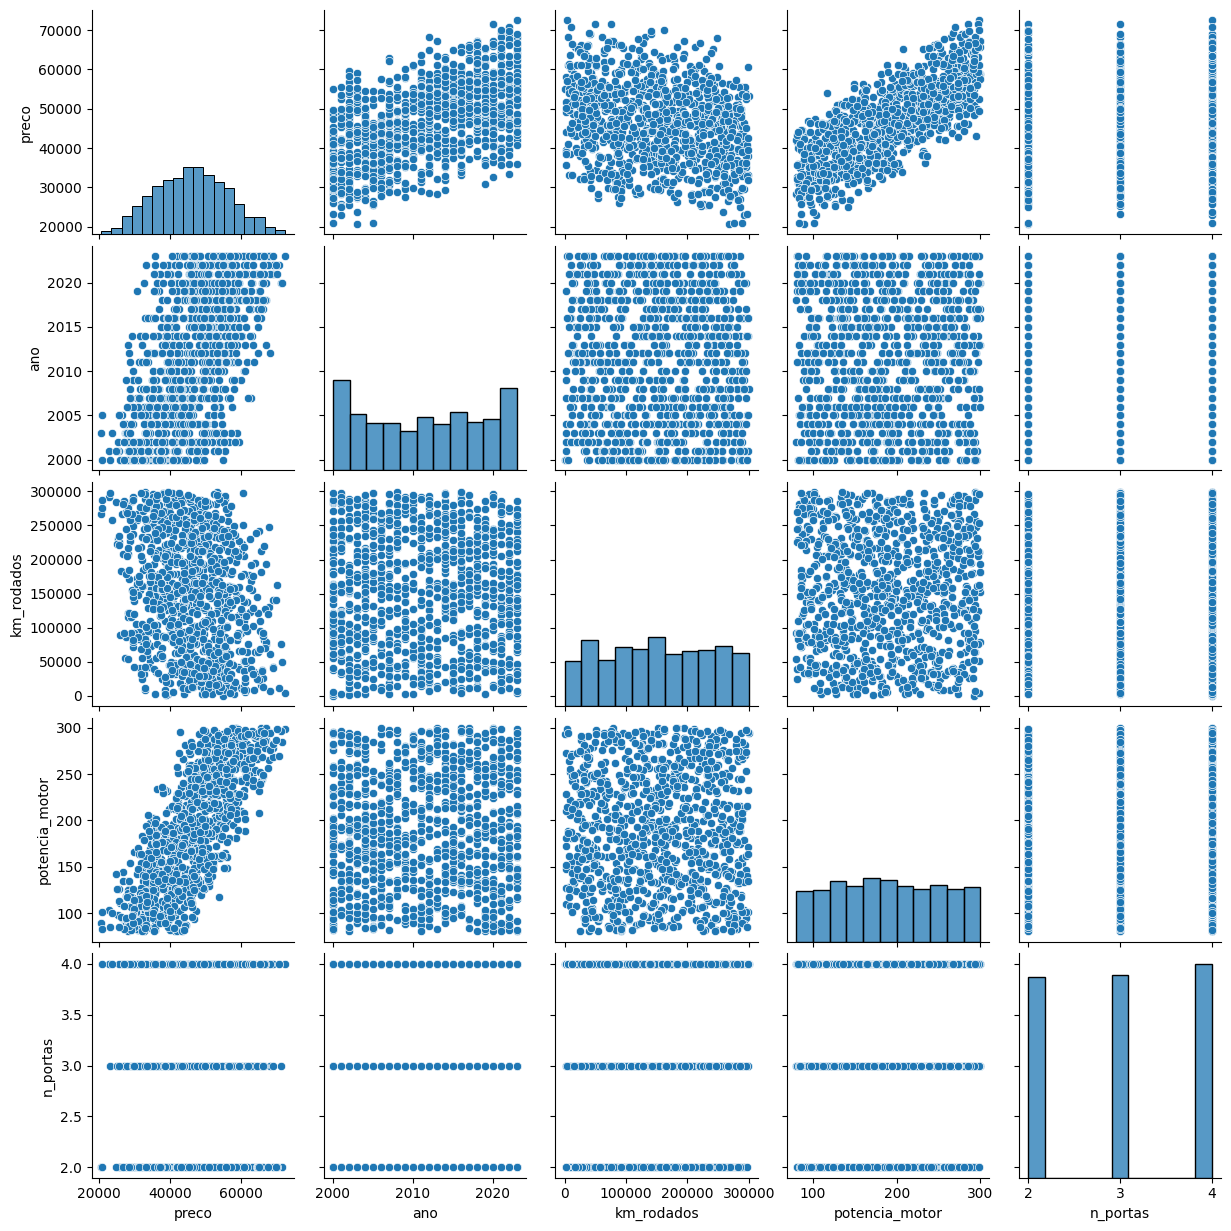

In [84]:
#Visualização
sns.pairplot(df)
plt.show()

In [85]:
# Tratamento e pré-processamento dos dados
df.isnull().sum()

preco               0
ano                 0
km_rodados          0
modelo              0
tipo_combustivel    0
potencia_motor      0
n_portas            0
dtype: int64

In [86]:
# Separar variáveis explicativas e alvo
X = df.drop('preco', axis=1)
y = df['preco']

In [87]:
# Identifica colunas numéricas e categoricas
colunas_numericas = ['ano', 'km_rodados','potencia_motor', 'n_portas']
colunas_categoricas = ['modelo', 'tipo_combustivel']

In [88]:
# Transformação - One-Hot Encoding
transformer = ColumnTransformer([
  ("one_hot", OneHotEncoder(drop='first'), colunas_categoricas),
  ('scaler', StandardScaler(), colunas_numericas)
], remainder='passthrough')

X_transformed = transformer.fit_transform(X)

In [89]:
# Divisão Treino/Teste

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,test_size=0.3,random_state=42)

In [90]:
# Treinar o Modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [91]:
# Avaliar o Modelo
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

MSE: 8348787.03
RMSE: 2889.43
R2: 0.9188


In [93]:
# Análise dos Coeficientes
onehot_features = transformer.named_transformers_['one_hot'].get_feature_names_out(colunas_categoricas)
final_feature_names = list(onehot_features) + colunas_numericas

coef_df = pd.DataFrame({
  'Variavel': final_feature_names,
  'Coeficiente': modelo.coef_
})


print(coef_df)


                     Variavel  Coeficiente
0        modelo_Hatch Popular  -267.290280
1     modelo_Minivan Familiar   159.682293
2         modelo_Picape Media   207.855337
3         modelo_SUV Compacto  -198.421655
4         modelo_Sedan Basico  -351.961468
5        modelo_Sedan Premium    -4.556863
6     tipo_combustivel_Diesel  -154.723158
7       tipo_combustivel_Flex   120.620150
8   tipo_combustivel_Gasolina   -11.194752
9                         ano  5119.525656
10                 km_rodados -2834.732531
11             potencia_motor  7517.898411
12                   n_portas   -12.763290


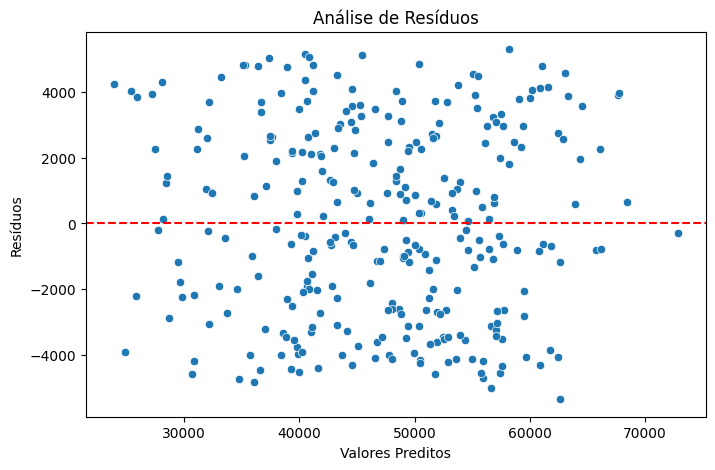

In [94]:
# Visualização de Resíduos
residuos = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()